In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
# Step 2: Create sample dataset
data = [
    {'JobTitle': 'Data Analyst', 'ExperienceYears': 1, 'EducationLevel': 'Bachelor', 'Location': 'Delhi', 'Salary': 400000},
    {'JobTitle': 'Software Engineer', 'ExperienceYears': 2, 'EducationLevel': 'Master', 'Location': 'Bangalore', 'Salary': 650000},
    {'JobTitle': 'Manager', 'ExperienceYears': 4, 'EducationLevel': 'Bachelor', 'Location': 'Mumbai', 'Salary': 500000},
    {'JobTitle': 'Data Scientist', 'ExperienceYears': 3, 'EducationLevel': 'PhD', 'Location': 'Hyderabad', 'Salary': 720000},
    {'JobTitle': 'HR Specialist', 'ExperienceYears': 4, 'EducationLevel': 'Master', 'Location': 'Kolkata', 'Salary': 500000}
]

df = pd.DataFrame(data)

In [3]:
# Step 3: Preprocess data
X = df.drop('Salary', axis=1)
y = df['Salary']

In [4]:
# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [5]:
# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

In [8]:
# Manually compute RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [9]:
print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 192955.6650246306
R² Score: nan


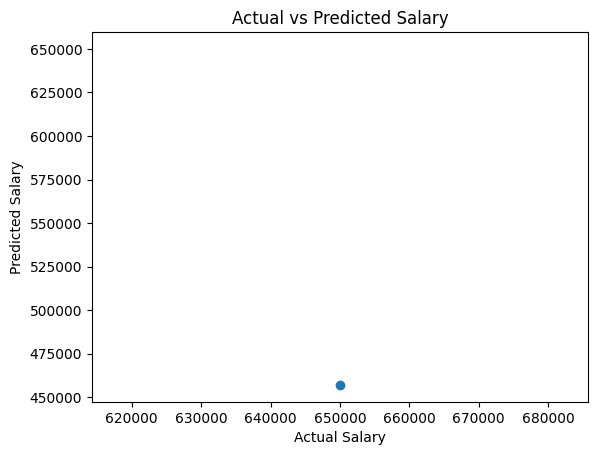

In [10]:
# Step 7: Visualize predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [11]:
# Get feature names
feature_names = X.columns
coefficients = model.coef_

In [12]:
# Create a DataFrame to show feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

importance_df

,Feature,Coefficient
1,JobTitle_Data Scientist,71034.482759
8,Location_Hyderabad,71034.482759
6,EducationLevel_PhD,71034.482759
0,ExperienceYears,35665.024631
4,JobTitle_Software Engineer,0.000000
2,JobTitle_HR Specialist,-14187.192118
5,EducationLevel_Master,-14187.192118
9,Location_Kolkata,-14187.192118
3,JobTitle_Manager,-21280.788177
10,Location_Mumbai,-21280.788177
